In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import copy
import sys
import os

from numpy import array
from numpy import mean
from numpy import cov
from numpy import diag
from numpy import dot
from numpy import zeros
from numpy.linalg import eigh
from scipy.linalg import svd

def visualize(im1, im2, k):
	# displays two images
    im1 = im1.astype('uint8')
    #im2 = im2.astype('uint8')
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(im1,cmap='gray')
    plt.axis('off')
    plt.title('Original')
    f.add_subplot(1,2, 2)
    plt.imshow(im2,cmap='gray')
    plt.axis('off')
    plt.title('Cluster: '+str(k))
    plt.savefig('k_means_'+str(k)+'.jpg')
    plt.show()
    return None

def MSE(Im1, Im2):
	# computes error
	Diff_Im = Im2-Im1
	Diff_Im = np.power(Diff_Im, 2)
	Diff_Im = np.sum(Diff_Im, axis=2)
	Diff_Im = np.sqrt(Diff_Im)
	sum_diff = np.sum(np.sum(Diff_Im))
	avg_error = sum_diff / float(Im1.shape[0]*Im2.shape[1])
	return avg_error

In [2]:
data = []
paths = []
ans = []
for r, d, f in os.walk('../../Data/Faces/'):
    for file in f:
        if '.png' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    data.append(np.array(img))

In [3]:
len(data)

100

In [4]:
data = np.array(data)

In [5]:
noprob = np.array(data).reshape(100,2500)

In [6]:
M = mean(noprob.T,axis=1)

In [7]:
M.shape

(2500,)

In [8]:
C = noprob - M

In [9]:
C.shape

(100, 2500)

In [10]:
V = cov(C.T)

In [11]:
V.shape

(2500, 2500)

In [20]:
# Singular-value decomposition
U, s, VT = svd(C)
# create m x n Sigma matrix
Sigma = zeros((C.shape[0], C.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:C.shape[0], :C.shape[0]] = diag(s)

In [21]:
# select
n_elements = 1000
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]

In [22]:
# reconstruct
B = U.dot(Sigma.dot(VT))

In [23]:
B.shape

(100, 2500)

In [24]:
recon = B.reshape(100,50,50)

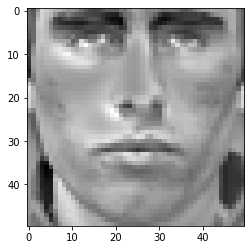

In [25]:
plt.imshow(recon[0],cmap='gray')

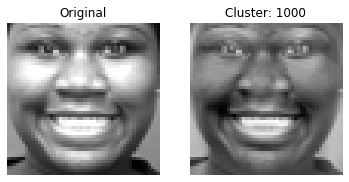

In [26]:
pic = 5
visualize(data[pic],recon[pic],n_elements)

In [27]:
MSE(data,recon)

1035.2497588173965